# **Algo-5 : Lasso Regression**

# Step - 1 : Business Problem Understanding
- Predict **Expenses** of a person based on individual characteristics (input variables)

# Step - 2 : Data Understanding
- Load Data
- Understand every variable
- Data Exploration
- EDA

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_excel("insurance.xlsx")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


- **Data Understanding**

In [107]:
df.shape

(1338, 7)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [109]:
df["age"].describe()              # Continuous variable

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [110]:
df["sex"].unique()                  # Categorical variable

array(['female', 'male'], dtype=object)

In [111]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [112]:
df["bmi"].describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [120]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [122]:
df["smoker"]. value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [124]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [126]:
df. columns. tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [128]:
continous = ['age', 'bmi', 'expenses']

discrete_categorical = ['sex', 'smoker', 'region']

discrete_count = ['children']

In [130]:
df[continous].describe()

,age,bmi,expenses
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,13270.422414
std,14.049960,6.098382,12110.011240
min,18.000000,16.000000,1121.870000
25%,27.000000,26.300000,4740.287500
50%,39.000000,30.400000,9382.030000
75%,51.000000,34.700000,16639.915000
max,64.000000,53.100000,63770.430000


In [132]:
df[continous].skew()  # Age, bmi are normal skewed, expenses is right skewed but as it is a output variable we dont touch it

age         0.055673
bmi         0.284593
expenses    1.515880
dtype: float64

In [134]:
df[discrete_categorical].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [136]:
df.duplicated().sum()

1

In [138]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# **Step - 3 : Data Preprocessing**
- remove unwanted columns
- add new columns as per requirements
- data cleaning
- data wrangling

**Data Cleaning**

In [141]:
df.drop_duplicates(inplace=True)

**Encoding**

In [144]:
df = pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,True,False,True,False,False
1334,18,31.9,0,2205.98,False,False,False,False,False
1335,18,36.9,0,1629.83,False,False,False,True,False
1336,21,25.8,0,2007.95,False,False,False,False,True


In [146]:
df.to_excel("cleaned_data_2.xlsx")

**X&y**

In [149]:
X = df.drop('expenses', axis=1)
y = df ['expenses' ]

In [151]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,False,True,False,False,True
1,18,33.8,1,True,False,False,True,False
2,28,33.0,3,True,False,False,True,False
3,33,22.7,0,True,False,True,False,False
4,32,28.9,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,True,False,True,False,False
1334,18,31.9,0,False,False,False,False,False
1335,18,36.9,0,False,False,False,True,False
1336,21,25.8,0,False,False,False,False,True


In [153]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

**Train Test Split**

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [158]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1332,52,44.7,3,False,False,False,False,True
666,49,28.7,1,True,False,False,False,True
1155,36,22.1,3,False,False,False,False,False
619,55,37.1,0,False,False,False,False,True
9,60,25.8,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...
56,58,31.8,2,False,False,False,False,False
501,43,26.0,0,True,False,False,False,False
639,56,33.7,4,True,False,False,True,False
348,36,29.9,1,False,False,False,True,False


# **Step-4,5 : Modelling & Evaluation**

**Applying Hyperparameter tuning for Lasso Regression**

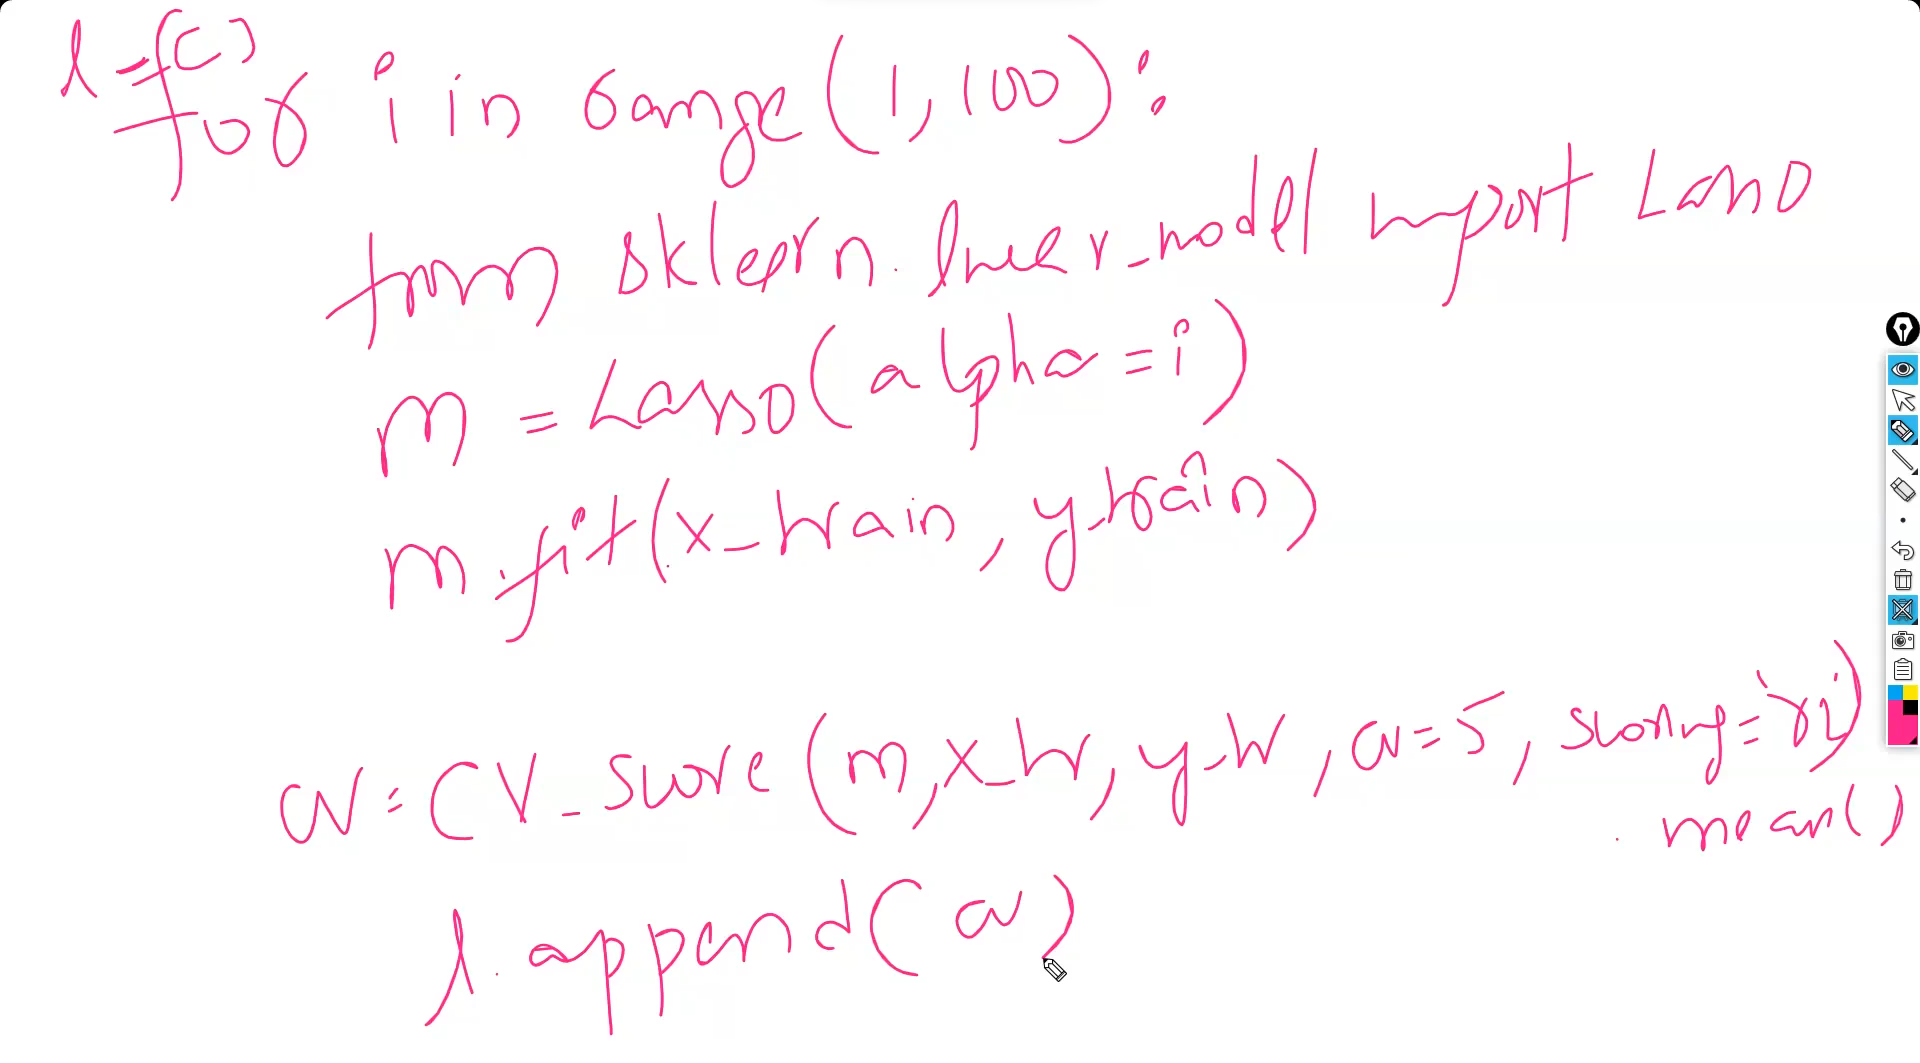

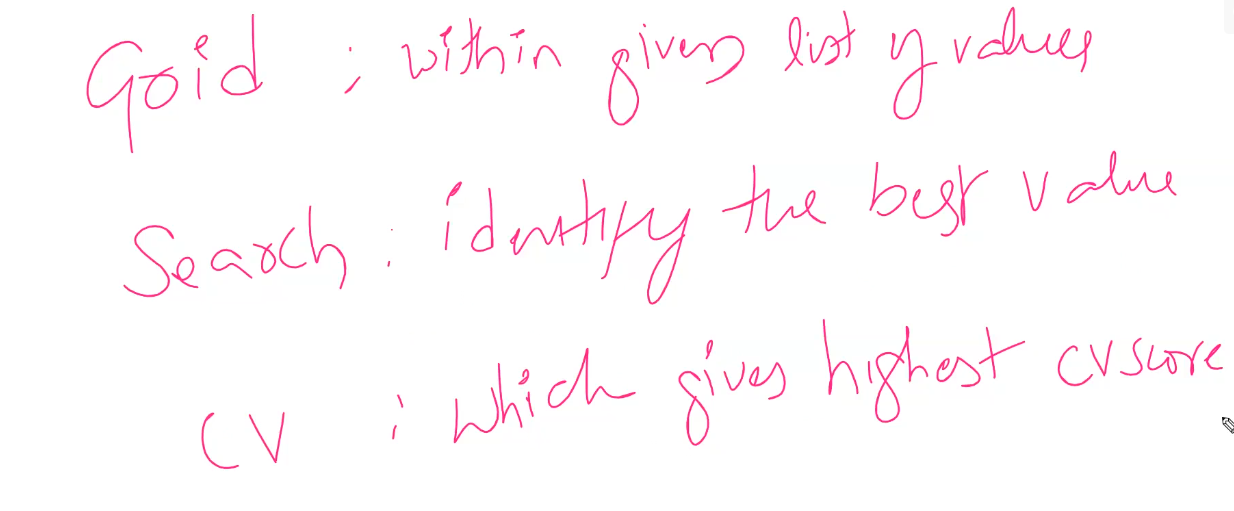

In [163]:
from sklearn.model_selection import GridSearchCV

# model
from sklearn. linear_model import Lasso
estimator = Lasso()

# parameters & values
param_grid = {"alpha":list(range(0,100))}

#Identifying the best value of the parameter within given values for the given data
model_hp = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

model_hp.fit(X_train,y_train)

model_hp.best_params_

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.544e+10, tolerance: 1.313e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

{'alpha': 91}

**Build Lasso Model using best Hyperparameters**

In [165]:
#Modelling
from sklearn. linear_model import Lasso
lasso_best = Lasso(alpha=91)
lasso_best.fit(X_train,y_train)

print("Intercept:", lasso_best.intercept_)
print("coefficients:",lasso_best.coef_)


#prediction & Evaluation on train data
ypred_train = lasso_best.predict(X_train)

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#CV
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(lasso_best,X_train,y_train,cv=5).mean())


# prediction & Evaluation on test data
ypred_test = lasso_best.predict(X_test)

from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -11964.522394972553
coefficients: [  264.25851927   316.51480451   353.70999239    -0.
 23438.92211153     0.            -0.            -0.        ]
Train R2: 0.7590022152855
CV Score: 0.7535403926375602
Test R2: 0.7009476425484661


In [167]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1332,52,44.7,3,False,False,False,False,True
666,49,28.7,1,True,False,False,False,True
1155,36,22.1,3,False,False,False,False,False
619,55,37.1,0,False,False,False,False,True
9,60,25.8,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...
56,58,31.8,2,False,False,False,False,False
501,43,26.0,0,True,False,False,False,False
639,56,33.7,4,True,False,False,True,False
348,36,29.9,1,False,False,False,True,False


# Final lasso Model

- with best hyperparameter & with important features

In [169]:
X = X.drop(["sex_male","region_northwest","region_southeast","region_southwest"], axis=1)

y = df["expenses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=9)

#Modelling
from sklearn. linear_model import Lasso
lasso_best = Lasso(alpha=91)
lasso_best.fit(X_train,y_train)

print("Intercept:", lasso_best.intercept_)
print("coefficients:",lasso_best.coef_)

#prediction & Evaluation on train data
ypred_train = lasso_best.predict(X_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("CV Score:", cross_val_score(lasso_best, X_train, y_train,cv=5).mean())

# prediction & Evaluation on test data
ypred_test = lasso_best.predict(X_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -11964.481585146465
coefficients: [  264.25843878   316.51351403   353.71167854 23438.92213851]
Train R2: 0.7590022156963389
CV Score: 0.7536858011364211
Test R2: 0.7009476553712519
